## Global Imports

In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

import datetime as datetime


import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go


import matplotlib.pyplot as plt
import calendar

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
import pickle

In [4]:
data=pd.read_csv('training_data.csv')

In [5]:
data.columns

Index(['Unnamed: 0', 'Amount', 'Use Chip', 'Merchant City', 'Merchant State',
       'MCC', 'Is Fraud?', 'Current Age', 'Latitude', 'Longitude',
       'Yearly Income - Person', 'FICO Score', 'CARD INDEX', 'Card Brand',
       'Card Type', 'Card Number', 'Has Chip', 'Credit Limit'],
      dtype='object')

In [6]:
data=data.drop('Unnamed: 0',axis=1)

In [7]:
data.columns

Index(['Amount', 'Use Chip', 'Merchant City', 'Merchant State', 'MCC',
       'Is Fraud?', 'Current Age', 'Latitude', 'Longitude',
       'Yearly Income - Person', 'FICO Score', 'CARD INDEX', 'Card Brand',
       'Card Type', 'Card Number', 'Has Chip', 'Credit Limit'],
      dtype='object')

In [8]:
data.shape

(59514, 17)

## Split Train and Test data

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3)

In [10]:
test_copy=test.copy()

In [11]:
test.shape

(17855, 17)

In [12]:
data['Merchant City'].nunique()

4075

## Train Data Prepartion

In [13]:
data['Is Fraud?'].value_counts()

Is Fraud?
1    29757
0    29757
Name: count, dtype: int64

In [14]:
train_data=data.copy()

In [15]:
train_data.columns

Index(['Amount', 'Use Chip', 'Merchant City', 'Merchant State', 'MCC',
       'Is Fraud?', 'Current Age', 'Latitude', 'Longitude',
       'Yearly Income - Person', 'FICO Score', 'CARD INDEX', 'Card Brand',
       'Card Type', 'Card Number', 'Has Chip', 'Credit Limit'],
      dtype='object')

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59514 entries, 0 to 59513
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Amount                  59514 non-null  float64
 1   Use Chip                59514 non-null  object 
 2   Merchant City           59514 non-null  object 
 3   Merchant State          59514 non-null  object 
 4   MCC                     59514 non-null  int64  
 5   Is Fraud?               59514 non-null  int64  
 6   Current Age             59514 non-null  int64  
 7   Latitude                59514 non-null  float64
 8   Longitude               59514 non-null  float64
 9   Yearly Income - Person  59514 non-null  int64  
 10  FICO Score              59514 non-null  int64  
 11  CARD INDEX              59514 non-null  int64  
 12  Card Brand              59514 non-null  object 
 13  Card Type               59514 non-null  object 
 14  Card Number             59514 non-null

In [17]:
train_data['Use Chip'].unique()

array(['Online Transaction', 'Chip Transaction', 'Swipe Transaction'],
      dtype=object)

In [18]:
train_data['Use Chip']=train_data['Use Chip'].map({'Swipe Transaction':1, 'Chip Transaction':2, 'Online Transaction':3})

train_data['Card Brand']=train_data['Card Brand'].map({'Visa':1, 'Amex':2, 'Mastercard':3, 'Discover':4})

In [19]:
train_data.shape

(59514, 17)

In [20]:
label_encoder = LabelEncoder()
columns_to_convert_in_string_to_int = ['Merchant City','Merchant State','Card Type']
for col in columns_to_convert_in_string_to_int:
    train_data [col] = label_encoder.fit_transform(train_data [col])
    with open(r'training_data'+ col+'.pkl', 'wb') as file:
        pickle.dump(label_encoder, file)
columns_to_convert_in_int_to_float = ['Merchant City','Merchant State','Use Chip','MCC','Card Brand','Card Type','Card Number','Has Chip','Credit Limit','Current Age','Yearly Income - Person','FICO Score']
for col in columns_to_convert_in_int_to_float:
    train_data [col] = train_data [col].astype('float64')

In [21]:
train_data.shape

(59514, 17)

In [22]:
train_data.head()

,Amount,Use Chip,Merchant City,Merchant State,MCC,Is Fraud?,Current Age,Latitude,Longitude,Yearly Income - Person,FICO Score,CARD INDEX,Card Brand,Card Type,Card Number,Has Chip,Credit Limit
0,287.13,3.0,2606.0,68.0,3001.0,1,53.0,34.15,-117.76,59696.0,787.0,0,1.0,1.0,4.344677e+15,1.0,24295.0
1,2.41,3.0,2606.0,68.0,5651.0,1,53.0,34.15,-117.76,59696.0,787.0,0,1.0,1.0,4.344677e+15,1.0,24295.0
2,50.81,3.0,2606.0,68.0,4411.0,1,53.0,34.15,-117.76,59696.0,787.0,0,1.0,1.0,4.344677e+15,1.0,24295.0
3,248.36,3.0,2606.0,68.0,5732.0,1,53.0,34.15,-117.76,59696.0,787.0,0,1.0,1.0,4.344677e+15,1.0,24295.0
4,473.00,3.0,2606.0,68.0,3640.0,1,53.0,34.15,-117.76,59696.0,787.0,0,1.0,1.0,4.344677e+15,1.0,24295.0


In [23]:
x=train_data[train_data.columns[train_data.columns!='Is Fraud?']]
y=train_data['Is Fraud?']

In [24]:
y.unique()

array([1, 0])

In [25]:
x.head()

,Amount,Use Chip,Merchant City,Merchant State,MCC,Current Age,Latitude,Longitude,Yearly Income - Person,FICO Score,CARD INDEX,Card Brand,Card Type,Card Number,Has Chip,Credit Limit
0,287.13,3.0,2606.0,68.0,3001.0,53.0,34.15,-117.76,59696.0,787.0,0,1.0,1.0,4.344677e+15,1.0,24295.0
1,2.41,3.0,2606.0,68.0,5651.0,53.0,34.15,-117.76,59696.0,787.0,0,1.0,1.0,4.344677e+15,1.0,24295.0
2,50.81,3.0,2606.0,68.0,4411.0,53.0,34.15,-117.76,59696.0,787.0,0,1.0,1.0,4.344677e+15,1.0,24295.0
3,248.36,3.0,2606.0,68.0,5732.0,53.0,34.15,-117.76,59696.0,787.0,0,1.0,1.0,4.344677e+15,1.0,24295.0
4,473.00,3.0,2606.0,68.0,3640.0,53.0,34.15,-117.76,59696.0,787.0,0,1.0,1.0,4.344677e+15,1.0,24295.0


In [67]:
x.head()

AttributeError: 'list' object has no attribute 'head'

In [30]:
scaler = StandardScaler()
X_train_initial= scaler.fit_transform(x)
y_train_initial= y

In [32]:
import pickle
pickle.dump(scaler, open(r'scaled_data.sav', 'wb'))

## Test Data Prepartaion

In [33]:
with open(r'training_dataMerchant State.pkl', 'rb') as file:
    Merchant_state_label_encoder = pickle.load(file)

In [34]:
with open(r'training_dataMerchant City.pkl', 'rb') as file:
    Merchant_City_label_encoder = pickle.load(file)

In [35]:
with open(r'training_dataCard Type.pkl', 'rb') as file:
    Card_Type_label_encoder = pickle.load(file)

In [36]:
scaler1 = pickle.load(open(r'scaled_data.sav', 'rb'))

### Categorical variables

In [37]:
train_data['Merchant State'].unique==37.0

False

In [38]:
(test['Merchant State'] == 37.0).any()


np.False_

In [39]:
test.head()

,Amount,Use Chip,Merchant City,Merchant State,MCC,Is Fraud?,Current Age,Latitude,Longitude,Yearly Income - Person,FICO Score,CARD INDEX,Card Brand,Card Type,Card Number,Has Chip,Credit Limit
12988,11.50,Online Transaction,ONLINE,ONLINE,9402,1,65,41.02,-73.80,40957,608,1,Mastercard,Debit,5504734087292061,1,49107
15509,14.16,Swipe Transaction,Plymouth,MI,5310,1,66,42.22,-83.36,31175,711,0,Mastercard,Credit,5595124692967493,0,9000
23421,58.15,Online Transaction,ONLINE,ONLINE,5814,1,53,33.99,-117.53,40470,691,1,Mastercard,Debit,5754587881449040,1,18624
11037,1.07,Swipe Transaction,Port au Prince,Haiti,5812,1,57,44.08,-70.24,42411,765,0,Mastercard,Credit,5411382690193634,1,9700
50880,22.32,Online Transaction,ONLINE,ONLINE,4784,0,67,27.75,-82.64,23533,687,0,Visa,Debit,4801854572462060,1,16750


In [40]:
(train_data['Merchant State']==37.0).any()

np.True_

In [41]:
col='Merchant State'
test [col] = Merchant_state_label_encoder.transform(test [col])
test [col] = test [col].astype('float64')

In [42]:
test['Merchant State'].unique()==37.0

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [43]:
col='Merchant City'
test [col] = Merchant_City_label_encoder.transform(test [col])
test [col] = test [col].astype('float64')

In [44]:
col='Card Type'
test [col] = Card_Type_label_encoder.transform(test [col])
test [col] = test [col].astype('float64')

In [45]:
test['Use Chip']=test['Use Chip'].map({'Swipe Transaction':1, 'Chip Transaction':2, 'Online Transaction':3})

test['Card Brand']=test['Card Brand'].map({'Visa':1, 'Amex':2, 'Mastercard':3, 'Discover':4})

### Numerical Variables

In [46]:
x=['Use Chip','MCC','Card Brand','Card Number','Has Chip','Credit Limit','Current Age','Yearly Income - Person','FICO Score']
for i in x:
    test [x] = test [x].astype('float64')

In [47]:
X_test=test[test.columns[test.columns!='Is Fraud?']]
y_test=test['Is Fraud?']

In [48]:
X_test.head()

,Amount,Use Chip,Merchant City,Merchant State,MCC,Current Age,Latitude,Longitude,Yearly Income - Person,FICO Score,CARD INDEX,Card Brand,Card Type,Card Number,Has Chip,Credit Limit
12988,11.50,3.0,2606.0,68.0,9402.0,65.0,41.02,-73.80,40957.0,608.0,1,3.0,1.0,5.504734e+15,1.0,49107.0
15509,14.16,1.0,2899.0,47.0,5310.0,66.0,42.22,-83.36,31175.0,711.0,0,3.0,0.0,5.595125e+15,0.0,9000.0
23421,58.15,3.0,2606.0,68.0,5814.0,53.0,33.99,-117.53,40470.0,691.0,1,3.0,1.0,5.754588e+15,1.0,18624.0
11037,1.07,1.0,2934.0,26.0,5812.0,57.0,44.08,-70.24,42411.0,765.0,0,3.0,0.0,5.411383e+15,1.0,9700.0
50880,22.32,3.0,2606.0,68.0,4784.0,67.0,27.75,-82.64,23533.0,687.0,0,1.0,1.0,4.801855e+15,1.0,16750.0


In [49]:
X_test_initial= scaler1.transform(X_test)

In [50]:
X_test_initial

array([[-0.40940772,  1.21569687,  0.33557832, ...,  0.50677061,
         0.32235086,  3.05785813],
       [-0.39263914, -1.04541268,  0.63825941, ...,  0.57319968,
        -3.10220983, -0.42041126],
       [-0.11532721,  1.21569687,  0.33557832, ...,  0.69039096,
         0.32235086,  0.41422769],
       ...,
       [ 0.6560904 ,  1.21569687,  0.33557832, ..., -0.43203868,
         0.32235086, -0.40774945],
       [ 0.09673856,  1.21569687,  0.33557832, ...,  0.77353857,
         0.32235086, -0.0995297 ],
       [ 0.16450631, -1.04541268,  1.26531547, ...,  0.79593187,
         0.32235086,  0.61699015]])

In [51]:
x

['Use Chip',
 'MCC',
 'Card Brand',
 'Card Number',
 'Has Chip',
 'Credit Limit',
 'Current Age',
 'Yearly Income - Person',
 'FICO Score']

## Prediction Model Training

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('The model Name is:- ',str(model))
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    #print(y_pred)
    
    return accuracy, precision, recall, f1

In [55]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('True vs Predicted matrix')
    plt.show()

### Models

In [56]:
mls=[LogisticRegression(),
DecisionTreeClassifier(random_state=42),
RandomForestClassifier(),
GradientBoostingClassifier(),
XGBClassifier(use_label_encoder=False, eval_metric='logloss')]

## Model evaluation

In [ ]:
new_X

The model Name is:-  LogisticRegression()
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      8900
           1       0.80      0.76      0.78      8955

    accuracy                           0.78     17855
   macro avg       0.78      0.78      0.78     17855
weighted avg       0.78      0.78      0.78     17855



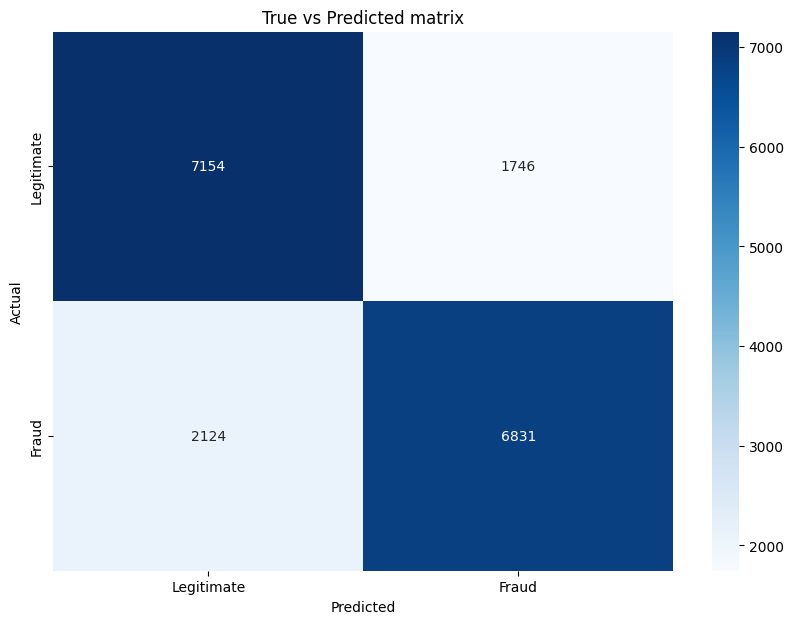

[0.7832539904788575, np.float64(0.7964323189926548), np.float64(0.7628140703517587), np.float64(0.7792607802874744)]
The model Name is:-  DecisionTreeClassifier(random_state=42)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8900
           1       1.00      1.00      1.00      8955

    accuracy                           1.00     17855
   macro avg       1.00      1.00      1.00     17855
weighted avg       1.00      1.00      1.00     17855



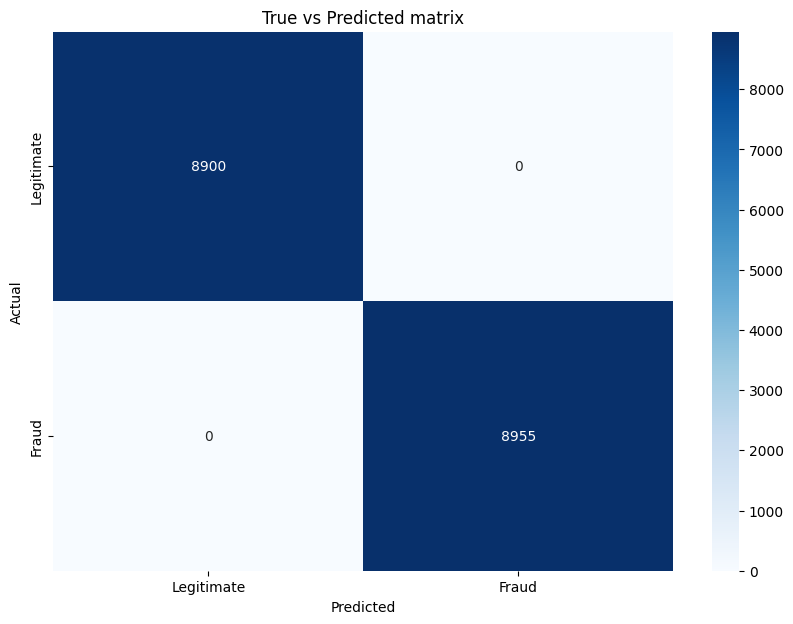

[1.0, np.float64(1.0), np.float64(1.0), np.float64(1.0)]
The model Name is:-  RandomForestClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8900
           1       1.00      1.00      1.00      8955

    accuracy                           1.00     17855
   macro avg       1.00      1.00      1.00     17855
weighted avg       1.00      1.00      1.00     17855



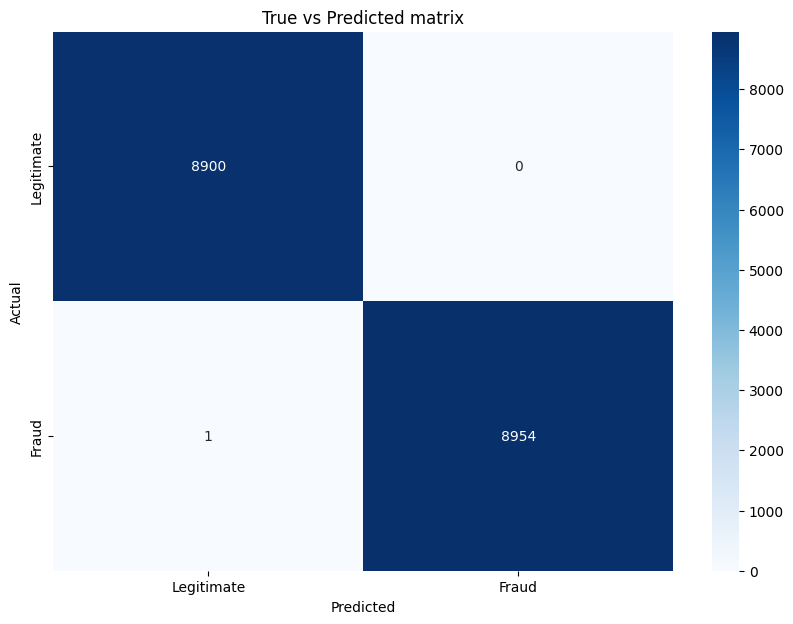

[0.9999439932791935, np.float64(1.0), np.float64(0.9998883305415969), np.float64(0.9999441621531073)]
The model Name is:-  GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      8900
           1       0.95      0.87      0.91      8955

    accuracy                           0.91     17855
   macro avg       0.91      0.91      0.91     17855
weighted avg       0.92      0.91      0.91     17855



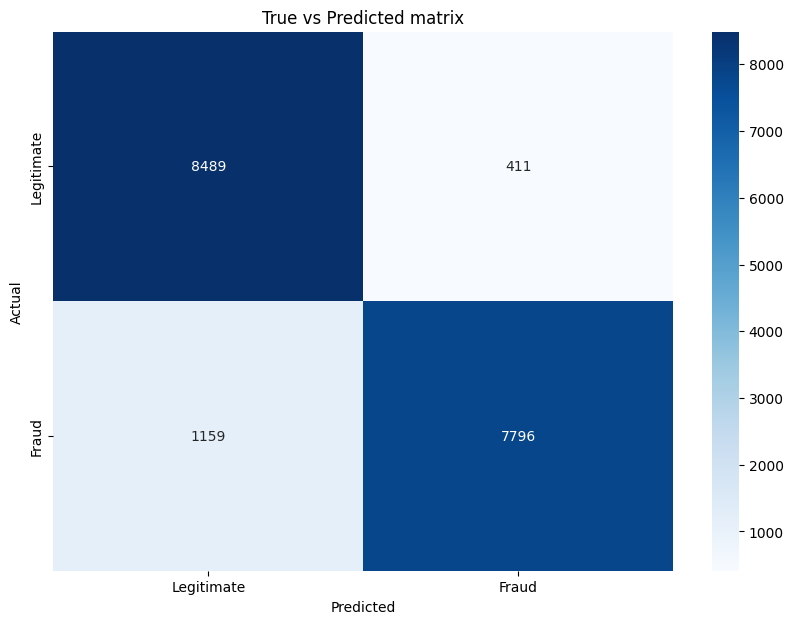

[0.9120694483338001, np.float64(0.9499207993176556), np.float64(0.8705750977107761), np.float64(0.9085188206502739)]


c:\Users\bharath.venkatesan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning:

[13:17:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




The model Name is:-  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8900
           1       0.98      0.95      0.96      8955

    accuracy                           0.96     1785

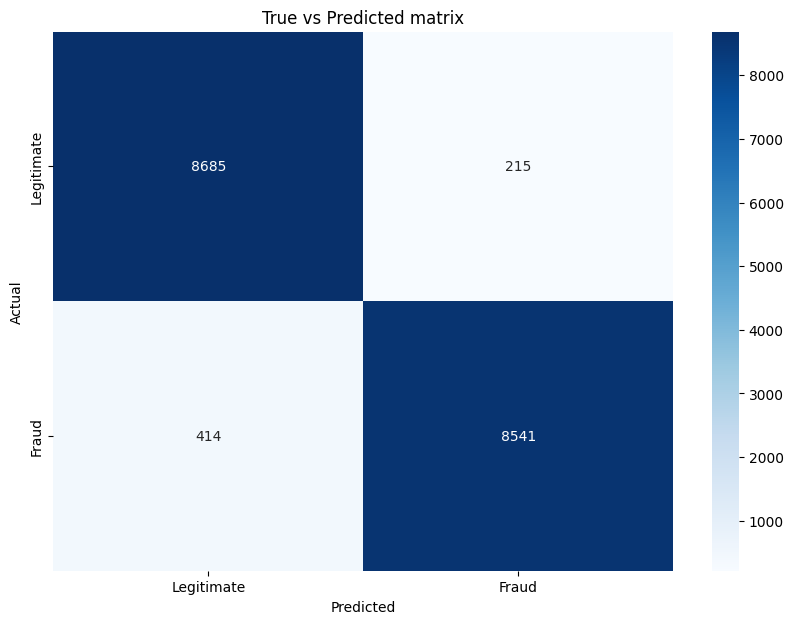

[0.9647717726127135, np.float64(0.9754454088624943), np.float64(0.9537688442211055), np.float64(0.9644853480887584)]


In [57]:
for i in mls:
    model=i
    accuracy, precision, recall, f1=evaluate_model(model, X_train_initial, y_train_initial, X_test_initial, y_test)
    print([accuracy, precision, recall, f1])

In [64]:
rfc=RandomForestClassifier()
rfc.fit(X_train_initial, y_train_initial)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8900
           1       1.00      1.00      1.00      8955

    accuracy                           1.00     17855
   macro avg       1.00      1.00      1.00     17855
weighted avg       1.00      1.00      1.00     17855



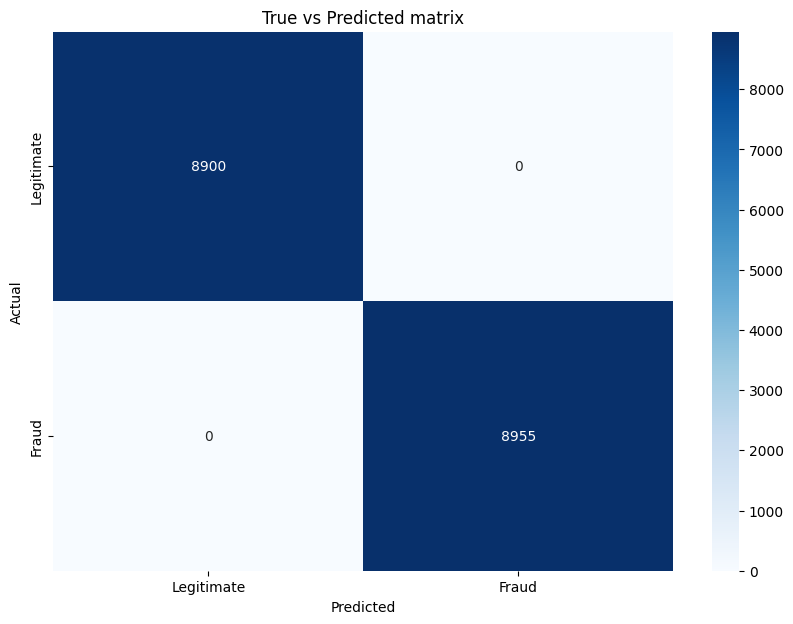

[1.0, np.float64(1.0), np.float64(1.0), np.float64(1.0)]


In [65]:
y_pred = rfc.predict(X_test_initial)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)
#print(y_pred)
print([accuracy, precision, recall, f1])

In [66]:
filename=r'casa_prediction.sav'
pickle.dump(rfc,open(filename,'wb'))